/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_53868/2750656892.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  yahoo_webpage = pd.read_html(response.text)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

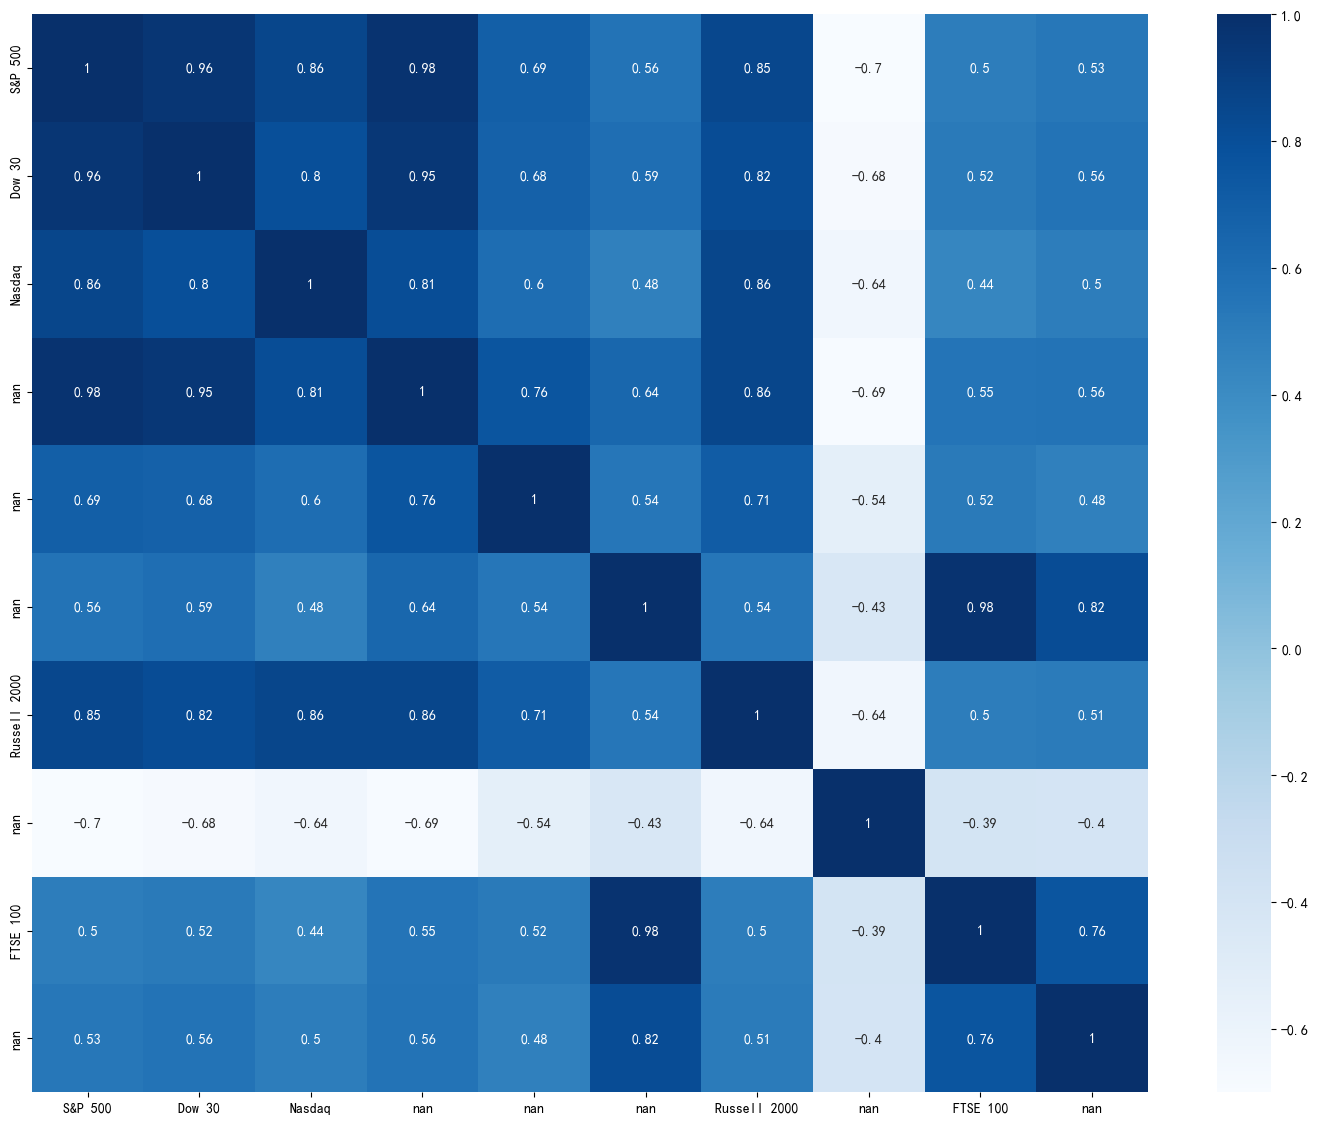

In [1]:
"""
全世界指數相關係數
1. 取得全世界指數
2. 計算指數報酬、風險
3. 計算相關係數、繪製熱力圖
"""

# 載入函數工具檔
from Data import getDataYF, getMultipleReturn
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 繪圖套件載入中文字體
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 取出全世界指數
url = "https://finance.yahoo.com/world-indices"
response = requests.get(url)
yahoo_webpage = pd.read_html(response.text)
world_index_page = yahoo_webpage[0]
world_index_symbols = world_index_page["Symbol"].to_list()

# 抓到所有指數的歷史報酬率
ret_dataframe = getMultipleReturn(getDataYF, world_index_symbols, "adj close")
ret_dataframe.columns = world_index_page["Name"].to_list()

# 計算相關性
corr = round(ret_dataframe.iloc[:, :10].corr(), 2)

# 並繪製熱力圖
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()
